<a href="https://colab.research.google.com/github/jofmorenore/TimeSeries/blob/master/proyecto/Proyecto_Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [totoro.banrep](https://totoro.banrep.gov.co/estadisticas-economicas/)

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm

In [3]:
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 

In [4]:
# para correr código R en colab
%load_ext rpy2.ipython

## Opción A 

Crédito de consumo, Tasa de interés 

Unidad: Tasa efectiva anual (porcentaje)

Fuente: Banco de la República, con información de la Superintendencia Financiera de Colombia
No incluye tarjetas de crédito.

In [5]:
tasa=pd.read_csv(r'https://raw.githubusercontent.com/jofmorenore/TimeSeries/master/proyecto/datos/Cr%C3%A9dito%20de%20consumo%20Tasa%20de%20inter%C3%A9s.csv')

In [6]:
tasa['Fecha']=pd.to_datetime(tasa['Fecha'])
tasa=tasa.set_index('Fecha')

In [7]:
tasa.head()

,Porcentaje (%)
Fecha,
2002-05-31,28.14
2002-06-30,27.87
2002-07-31,27.66
2002-08-31,27.44
2002-09-30,27.43


In [8]:
type(tasa) 

pandas.core.frame.DataFrame

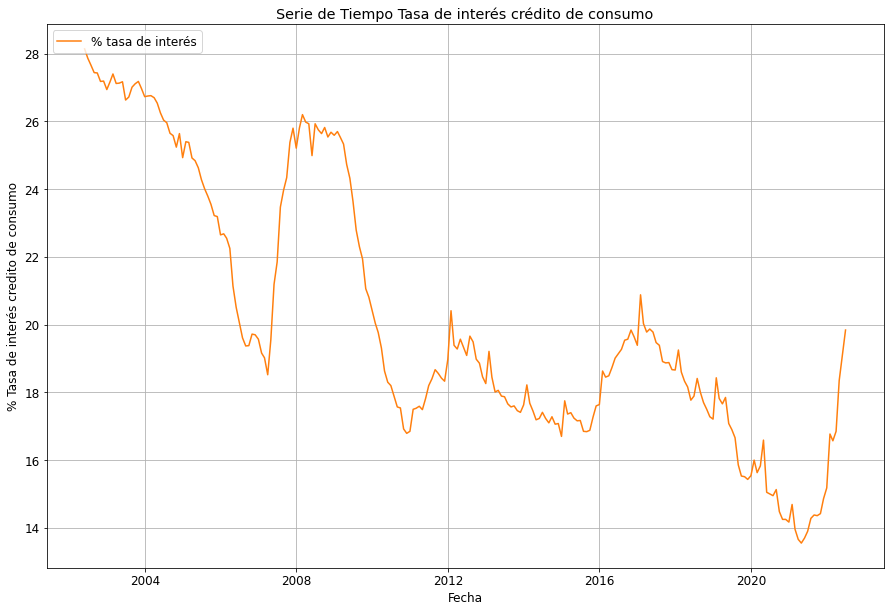

In [9]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(tasa, color='tab:orange', label='% tasa de interés')
ax.set_xlabel('Fecha')
ax.set_ylabel('% Tasa de interés credito de consumo')
ax.set_title('Serie de Tiempo Tasa de interés crédito de consumo')
ax.grid(True)
ax.legend(loc='upper left');

## Opción B

Remesas de trabajadores, mensual

Unidad: Millones de USD

Fuente: Banco de la República

In [10]:
remesas = pd.read_csv(r'https://raw.githubusercontent.com/jofmorenore/TimeSeries/master/proyecto/datos/Serie%20agregada%20de%20Remesas%20de%20trabajadores.csv')

In [11]:
remesas['Fecha']=pd.to_datetime(remesas['Fecha'])
remesas=remesas.set_index('Fecha')

In [12]:
remesas.head()

,Millones de USD
Fecha,
2000-01-31,103.751344
2000-02-29,145.837278
2000-03-31,125.347269
2000-04-30,115.880748
2000-05-31,129.341871


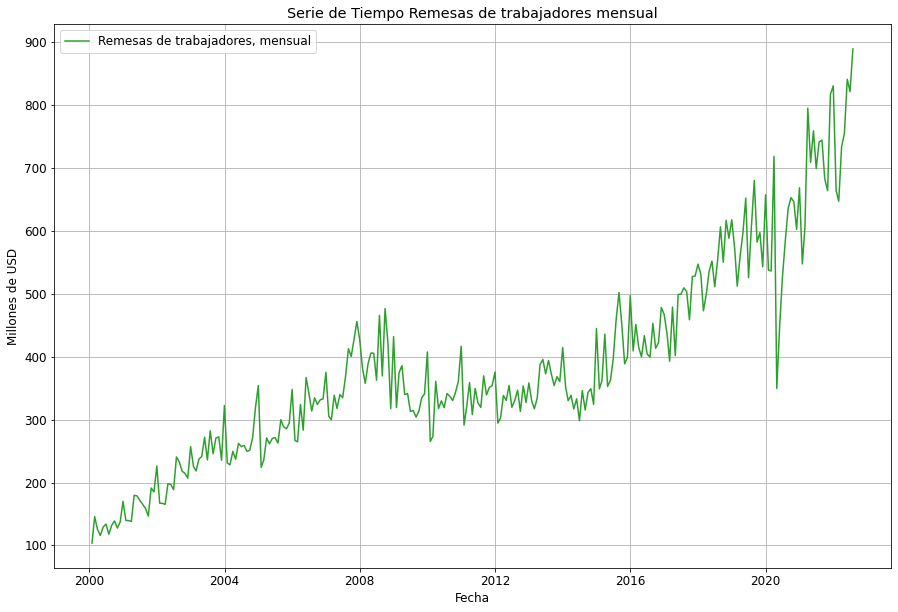

In [13]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(remesas, color='tab:green', label='Remesas de trabajadores, mensual')
ax.set_xlabel('Fecha')
ax.set_ylabel('Millones de USD')
ax.set_title('Serie de Tiempo Remesas de trabajadores mensual')
ax.grid(True)
ax.legend(loc='upper left');

Podemos observar una serie no estacionaria (la media difiere a lo largo del tiempo) con una tendencia estocástica (la cual no es una función suave) creciente, además de varianza marginal no constante, la serie diferenciada nos permitirá determinar si hay presencia de ciclos ocultos en la serie.




+ **serie diferenciada**

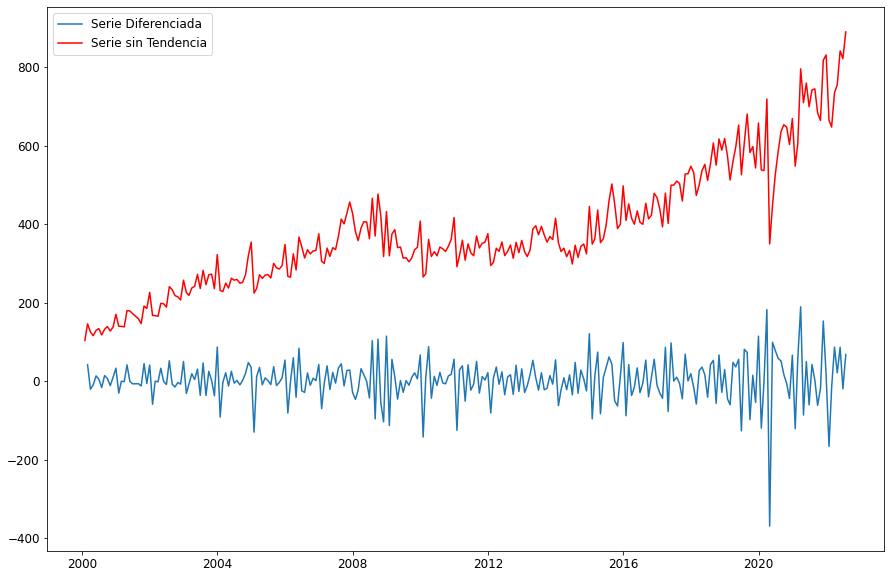

In [14]:
dif_remesas=remesas.diff(periods=1)

fig, ax = plt.subplots()
ax.plot(dif_remesas, '-', label="Serie Diferenciada")
ax.plot(remesas, 'r', label="Serie sin Tendencia")
ax.legend(loc="best");

+ **ACF plot**

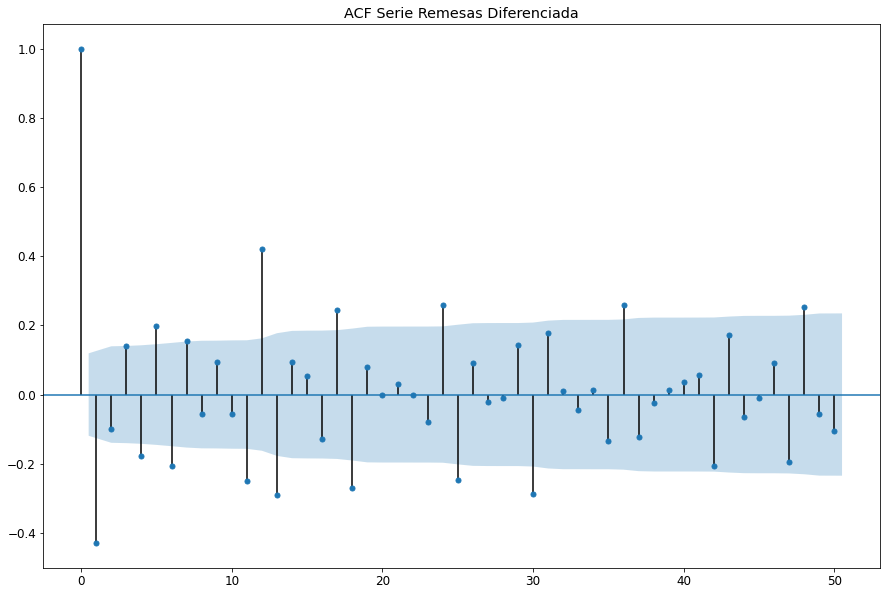

In [15]:
b=plot_acf(dif_remesas.dropna(),adjusted=False,lags=50,title='ACF Serie Remesas Diferenciada')

El gráfico de la función de autocorrelación evidencia que en los rezagos 1 y 12 el valor del coeficiente es alto lo sugiere una fuerte asociación estadística tanto negativa como postiva respectivamente, además a traves del gráfico se determina nuevamente que la serie no es estacionaria porque no se va rápidamente a cero.

+ **Transformación Box-Cox**

In [ ]:
import scipy as sp
import scipy.stats 
sp.stats.boxcox(remesas['Millones de USD'],alpha=0.05) #(0.058, 0.522)

In [17]:
%%R
install.packages("forecast")
#install.packages("FitAR")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpeRYIcf/downloaded_packages’



In [18]:
%%R
library(forecast)
# library(FitAR) # genera error en colab

  method            from
  as.zoo.data.frame zoo 



In [19]:
# -i pasar los datos de entorno python a R (analogamente -o: pasar los datos de entrono R a python)
%R -i remesas

In [20]:
%%R 
forecast::BoxCox.lambda(remesas$`Millones de USD`, method = "guerrero", lower = -1, upper = 3)

[1] 0.08589458


In [21]:
bc_remesas=sp.stats.boxcox(remesas['Millones de USD'],lmbda=0.08589458)
remesas = remesas.assign(bc_remesas=bc_remesas)   

In [22]:
remesas.head()

,Millones de USD,bc_remesas
Fecha,,
2000-01-31,103.751344,5.703735
2000-02-29,145.837278,6.218536
2000-03-31,125.347269,5.987766
2000-04-30,115.880748,5.869252
2000-05-31,129.341871,6.035336


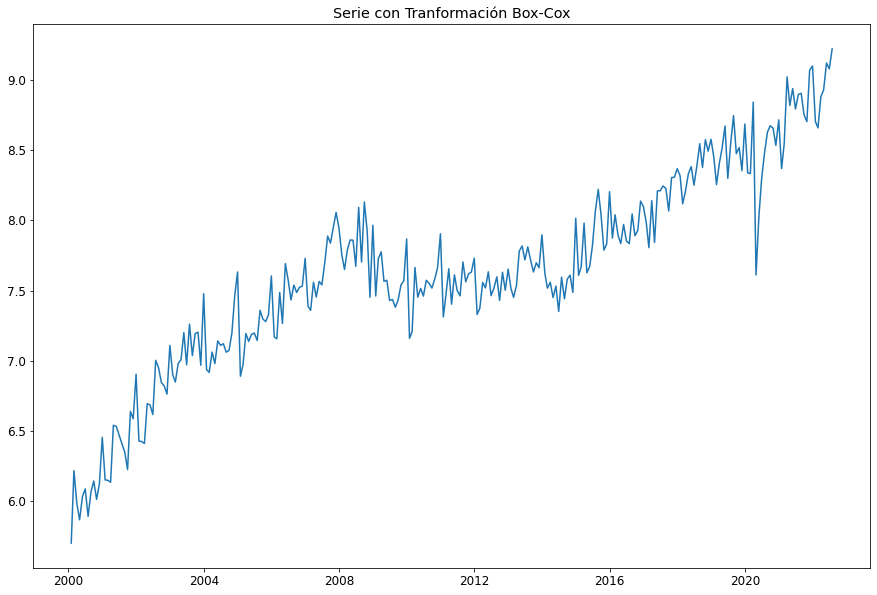

In [23]:
plt.plot(remesas['bc_remesas'])
plt.title('Serie con Tranformación Box-Cox') 
plt.show()

## Opción C

Inflación total

Unidad: Variación anual

Fuente: Departamento Administrativo Nacional de Estadística (DANE)
La inflación se define como la variación porcentual del IPC entre dos periodos. En particular la inflación anual se mide tomando el IPC de un mes y calculando su variación frente al dato del mismo mes del año anterior.

In [24]:
inflacion = pd.read_csv(r'https://raw.githubusercontent.com/jofmorenore/TimeSeries/master/proyecto/datos/Inflaci%C3%B3n%20total.csv')

In [25]:
inflacion['Fecha']=pd.to_datetime(inflacion['Fecha'])
inflacion=inflacion.set_index('Fecha')

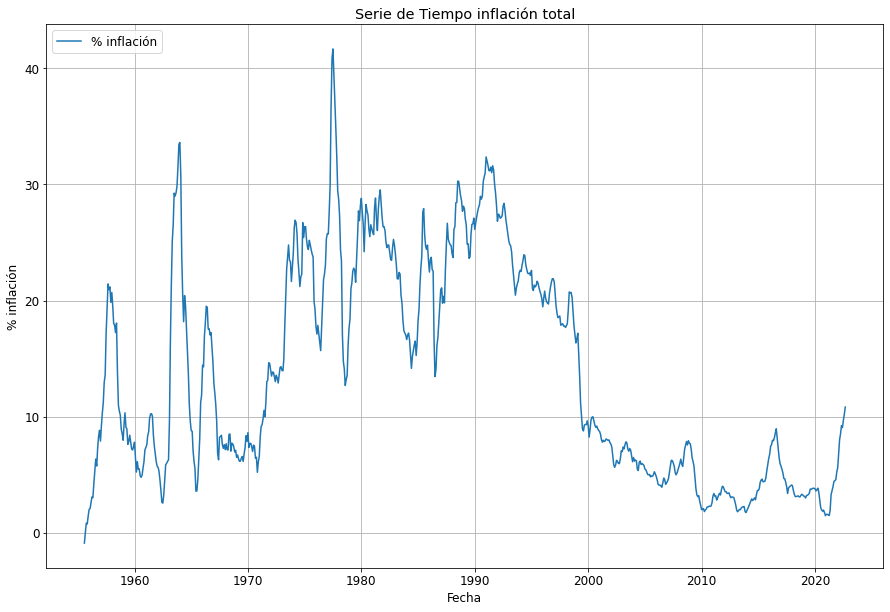

In [26]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(inflacion, color='tab:blue', label='% inflación')
ax.set_xlabel('Fecha')
ax.set_ylabel('% inflación')
ax.set_title('Serie de Tiempo inflación total')
ax.grid(True)
ax.legend(loc='upper left');